### Project 3 MVP

This model aims at predicting whether a user will listen to a recommended song in the next 4 weeks or not. Hence, it's the basis for a music recommendation system. The data was given by KKBOX as part of a competition on Kaggle.

In [13]:
import pandas as pd
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import r2_score, accuracy_score, f1_score, confusion_matrix, fbeta_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [2]:
with open('mvp_prediction.pkl','rb') as file:
    predictions = pkl.load(file)

In [7]:
y_test = predictions['y_test']
print('KNN AUC Score : '+str(roc_auc_score(y_test, predictions['lr'])))
print('Logistic AUC Score: '+str(roc_auc_score(y_test, predictions['knn'])))
print('Random Forest AUC Score: '+str(roc_auc_score(y_test, predictions['rf'])))
print('XGBoost Regression AUC Score: '+str(roc_auc_score(y_test, predictions['xgb'])))

KNN AUC Score : 0.5273234759684062
Logistic AUC Score: 0.607288976274209
Random Forest AUC Score: 0.5990453433261888
XGBoost Regression AUC Score: 0.6501455397095126


In [14]:
def confusionmatrix(y_lgr,y_knn,y_rf,y_xgboost, y_actual):
    models = zip(range(1,5),
             ['Logistic Regression', 'KNN','Random Forest', 'XGBoost'],
             [y_lgr, y_knn, y_rf, y_xgboost])
    plt.figure(figsize=(12,12))
    for ind, name, pred in models:
        plt.subplot(2, 2, ind)
        cm = confusion_matrix(y_actual,pred)
        sns.heatmap(cm,
                cmap=plt.cm.Blues,
                annot=True,
                square=True,
                xticklabels=[0,1],
                yticklabels=[0,1],
                fmt='g')
        plt.title(name, size=15);

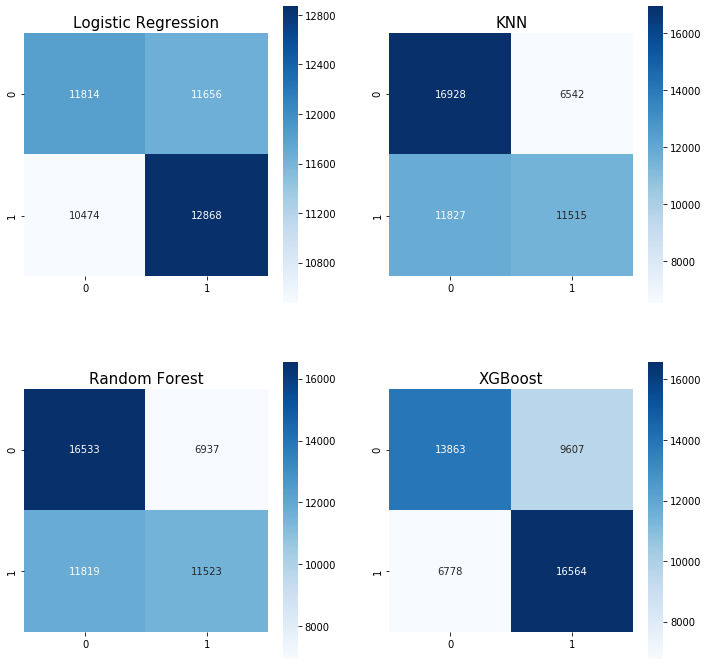

In [15]:
confusionmatrix(predictions['lr'],predictions['knn'],predictions['rf'],predictions['xgb'],y_test)

I am currently still working on feature engineering to improve the predictive power of the model, by for example adding the probability of using a certain source for each user. The baseline resulted in an AUC score slighlty below .5, so feature engineering already improved the predictive power of the model. After I finished the fieature engineering, I'll put more emphasis on the models. Instead of KNN, Random Forest and XGBoost, I am planning to use Light GBM. 